In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *


Phi: 99.551133 +/- 0.744903
Theta: 59.671059 or +/- 0.855060
Phi(naive): 100.112000
Theta(naive): 64.534300


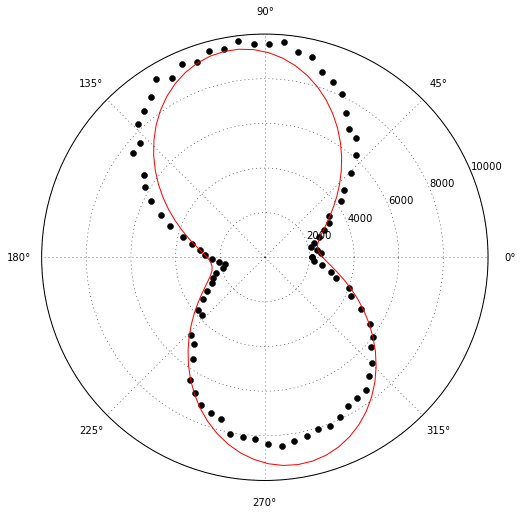

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-12-16\Nabond ND on CPW 0.5mW scan 2 x169 y73 B0V Rotor Sweep')
T1[:,1] -= 1500
OrientPol(T1,False)

Phi: 25.170882 +/- 0.645247
Theta: 52.361736 or +/- 0.606506
Phi(naive): 27.303000
Theta(naive): 56.754714


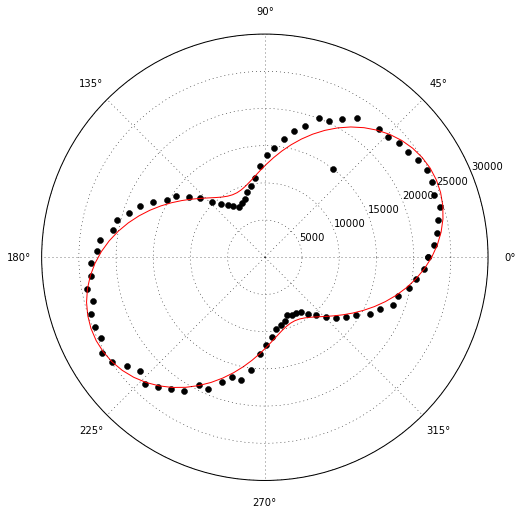

In [3]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-13-16\Nabond ND on CPW 0.5mW x65 y144 rotor sweep 1')
T1[:,1] -= 1500
OrientPol(T1,False)

[  1.49515677e+01   1.54707132e-02  -3.36686099e+00   1.03361625e+03
   1.00478941e+02]


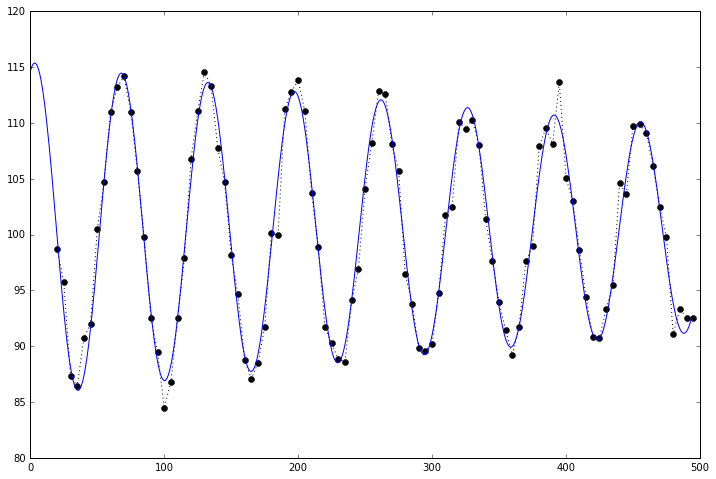

In [3]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[l:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-13-16\Nabond ND on CPW 2mW x65 y144 T25 Th52 d5.6 B0.29V 2 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-13-16\Nabond ND on CPW 2mW x65 y144 T25 Th52 d5.6 B0.29V 2 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=15500,p0=(100,14E-3,0,1200,900))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  202.78657789  2074.55021917  1193.86285012]
(1266.3507653061224, 0.02810107871161489, 0.0052103025848818521)


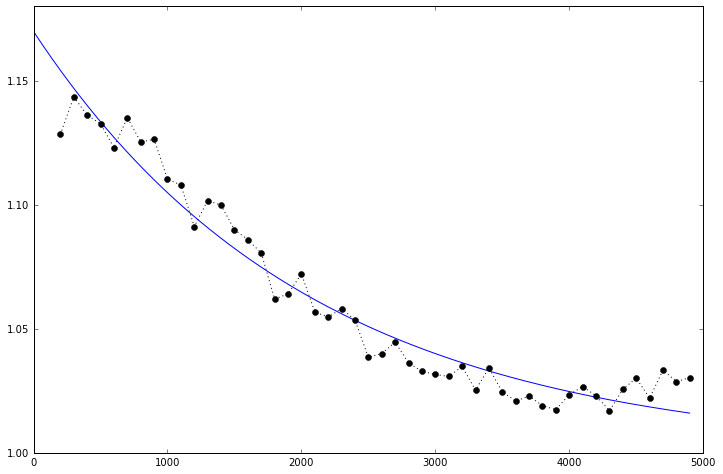

In [15]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-13-16\Nabond ND on CPW 2mW x65 y144 T25 Th52 d5.6 B0.29V Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-13-16\Nabond ND on CPW 2mW x65 y144 T25 Th52 d5.6 B0.29V Hahn Pulse Seq')
#hahn1 = hahn1-np.min(hahn1)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

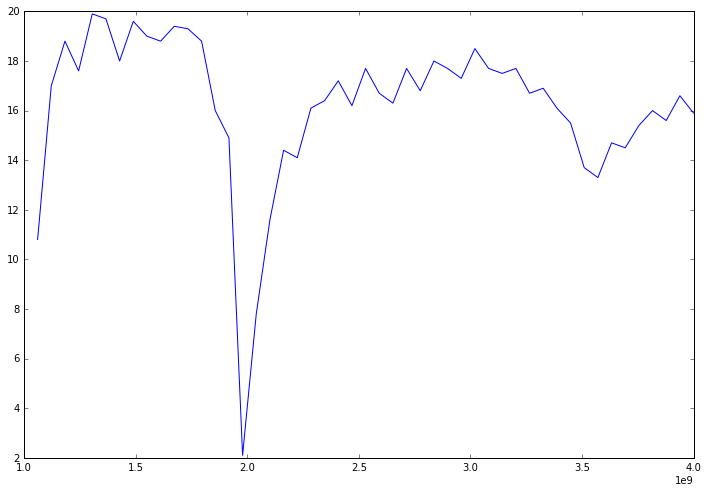

In [19]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-16-16\MNP 11-3-B on CPW transmission')
plt.plot(t[:,1],t[:,2]+24)